# Analyze UBI Dataset

In [1]:
import glob
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open(f'../../Data/train/train.txt', 'r') as f:
    UBI_DATA = [line.rstrip() for line in f.readlines()]
with open(f'../models/ubi-labels.txt', 'r') as f:
    classes = [line.rstrip() for line in f.readlines()]
print(f'Num of data: {len(UBI_DATA)}\nClass: {classes}')

Num of data: 50012
Class: ['vehicle', 'rider', 'pedestrian']


In [3]:
img_info = []
cls_info = dict.fromkeys(classes, 0)
for item in tqdm(UBI_DATA):
    xml_path = f"../../Data/train/labels/{item}.xml"

    with open(xml_path, "r") as f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            cls_info[obj_name] += 1
            
            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text
            img_info.append([obj_name, left, top, right, bottom])

print(f'Num of Objs: {len(img_info)}')
for cls in classes:
    print(f'Num of {cls:<12} {cls_info[cls]}')

100%|██████████| 50012/50012 [00:06<00:00, 7911.61it/s] 

Num of Objs: 411183
Num of vehicle      270596
Num of rider        88825
Num of pedestrian   51762


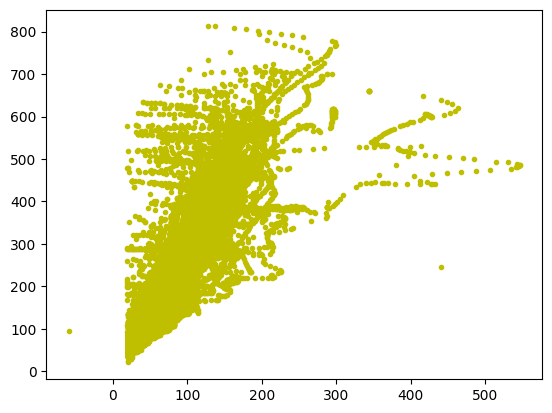

In [21]:
box_sizes = []
# ColorMap = {'vehicle':'r', 'rider':'g', 'pedestrian':'b'}
# colors = [classes.index(box[0]) for box in img_info]

for box in img_info:
    if box[0] == 'pedestrian':
        box_w = int(box[3]) - int(box[1])
        box_h = int(box[4]) - int(box[2])
        box_sizes.append((box_w, box_h))
    
box_sizes_array = np.array(box_sizes)
plt.scatter(x = box_sizes_array[:,0],y=box_sizes_array[:,1], marker='.', c='y')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(box_sizes_array)
print(kmeans.cluster_centers_)

/root/anaconda3/envs/ubi/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 69.59439651  80.53635001]
 [266.49503133 500.47711218]
 [388.8995028  287.41812985]
 [544.49207334 455.15937941]
 [210.91285247 150.69931018]
 [108.59816624 255.88036675]]
